<a href="https://colab.research.google.com/github/FaribaAzizian/BigData-1402/blob/main/BigData_HW6_FaribaAzizian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.2-bin-hadoop3'

In [5]:
!pip install -q findspark

In [6]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.2-bin-hadoop3'

In [7]:
!pip install pyspark --quiet
!pip install -q handyspark
#!pip install -U -q PyDrive --quiet 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import col,isnan, when, count

spark = SparkSession \
    .builder \
    .appName("Bank_dataset.") \
    .getOrCreate()

bank_data = spark.read.options(inferSchema='True',header='True',sep=',').csv("/content/drive/MyDrive/ML_hw_dataset.csv")

for col in bank_data.columns:
  print(col, "\t", "with null values: ", bank_data.filter(bank_data[col].isNull()).count())
bank_data.show()



age 	 with null values:  0
job 	 with null values:  0
marital 	 with null values:  0
education 	 with null values:  0
default 	 with null values:  0
housing 	 with null values:  0
loan 	 with null values:  0
contact 	 with null values:  0
month 	 with null values:  0
day_of_week 	 with null values:  0
duration 	 with null values:  0
campaign 	 with null values:  0
pdays 	 with null values:  0
previous 	 with null values:  0
poutcome 	 with null values:  0
emp_var_rate 	 with null values:  0
cons_price_idx 	 with null values:  0
cons_conf_idx 	 with null values:  0
euribor3m 	 with null values:  0
nr_employed 	 with null values:  0
y 	 with null values:  0
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   

In [32]:
#OverSampling
from pyspark.sql.functions import col, explode, array, lit

major_df = bank_data.filter(col("y") == 0)
minor_df = bank_data.filter(col("y") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

a = range(ratio)
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
bank_data = major_df.unionAll(oversampled_df)

#undersampling
#sampled_majority_df = major_df.sample(False, 1/ratio)
#bank_data = sampled_majority_df.unionAll(minor_df)

bank_data.show()


ratio: 7
+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44| blue-collar| married|           basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53|  technician| married|            unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0

In [10]:
bank_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)



In [54]:
from handyspark import *
bank_plot = bank_data.toHandy()
bank_plot.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


<Axes: title={'center': 'marital'}, xlabel='marital'>

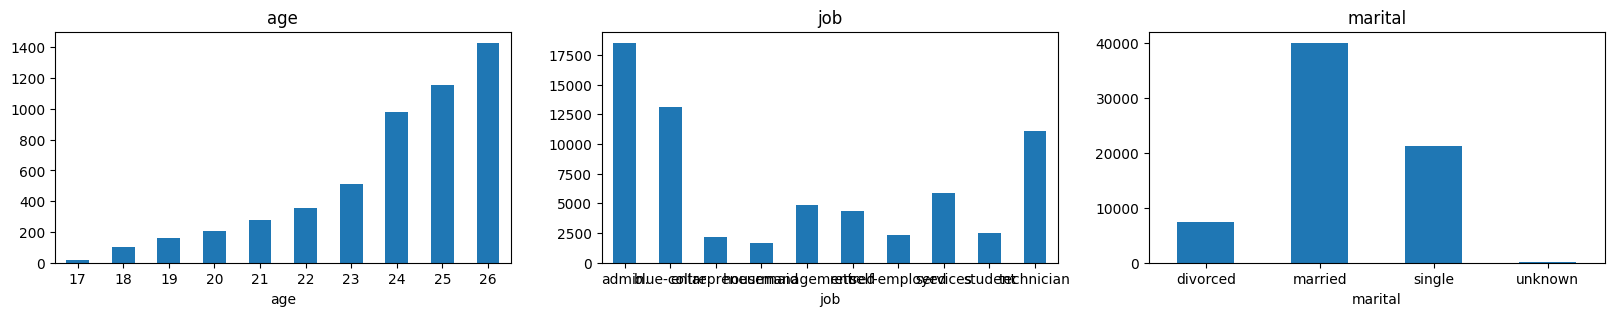

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 3))
bank_plot.cols['age'].hist(ax=axs[0])
bank_plot.cols['job'].hist(ax=axs[1])
bank_plot.cols['marital'].hist(ax=axs[2])

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal proper

<Axes: title={'center': 'housing'}, xlabel='housing'>

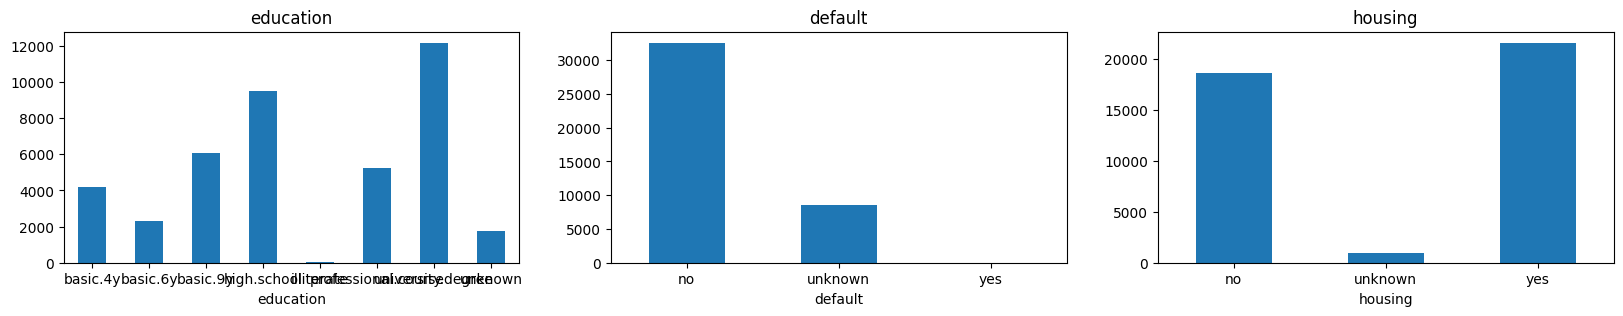

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
bank_plot.cols['education'].hist(ax=axs[0])
bank_plot.cols['default'].hist(ax=axs[1])
bank_plot.cols['housing'].hist(ax=axs[2])

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal proper

<Axes: title={'center': 'month'}, xlabel='month'>

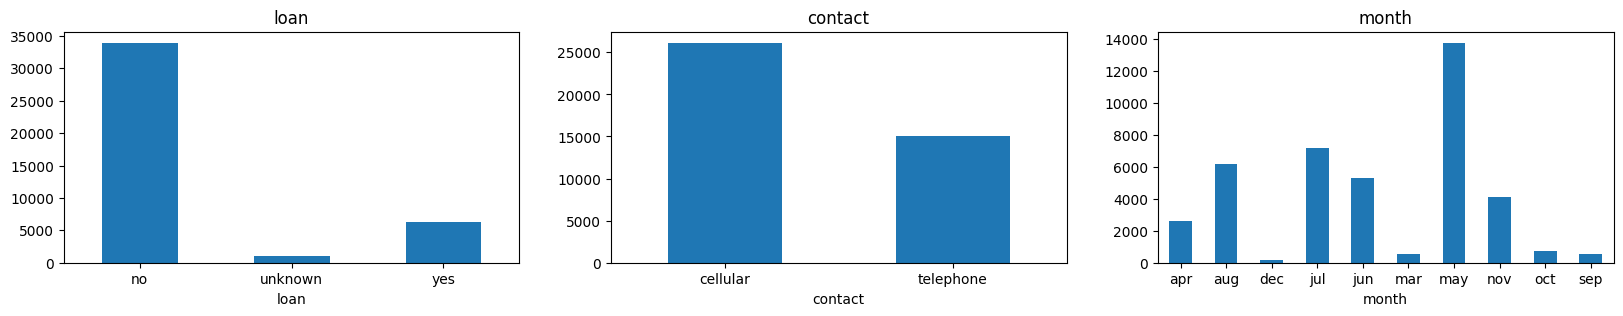

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
bank_plot.cols['loan'].hist(ax=axs[0])
bank_plot.cols['contact'].hist(ax=axs[1])
bank_plot.cols['month'].hist(ax=axs[2])

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal proper

<Axes: title={'center': 'campaign'}, xlabel='campaign'>

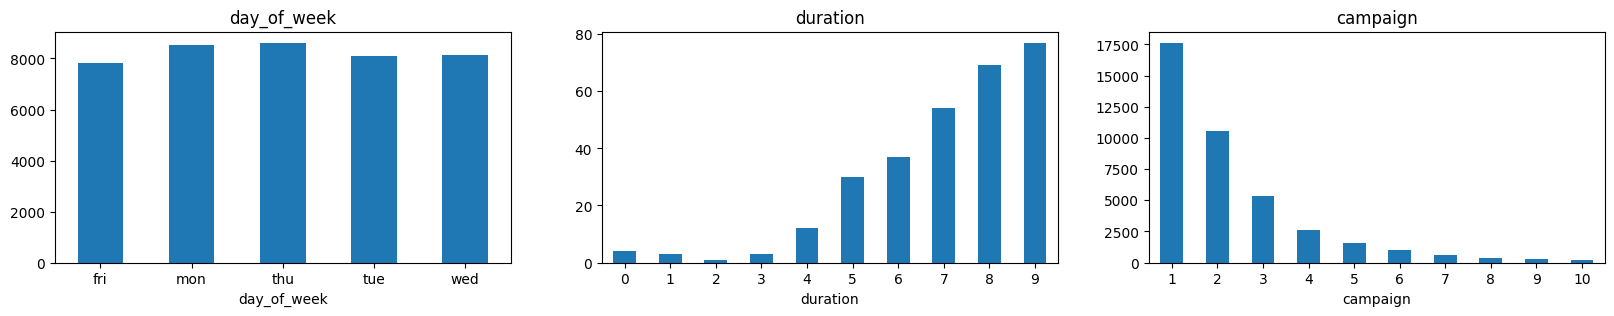

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
bank_plot.cols['day_of_week'].hist(ax=axs[0])
bank_plot.cols['duration'].hist(ax=axs[1])
bank_plot.cols['campaign'].hist(ax=axs[2])

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal proper

<Axes: title={'center': 'poutcome'}, xlabel='poutcome'>

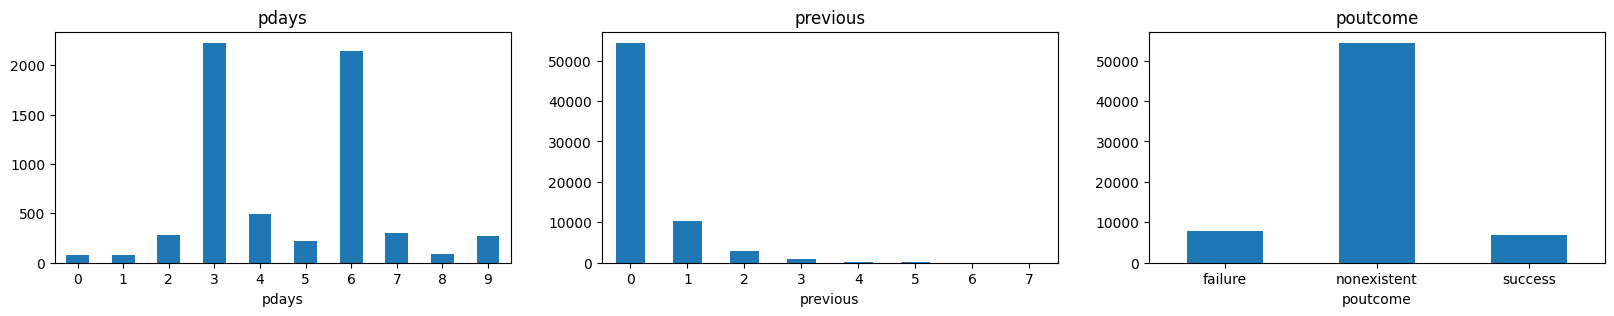

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
bank_plot.cols['pdays'].hist(ax=axs[0])
bank_plot.cols['previous'].hist(ax=axs[1])
bank_plot.cols['poutcome'].hist(ax=axs[2])

<Axes: title={'center': 'y'}, xlabel='y'>

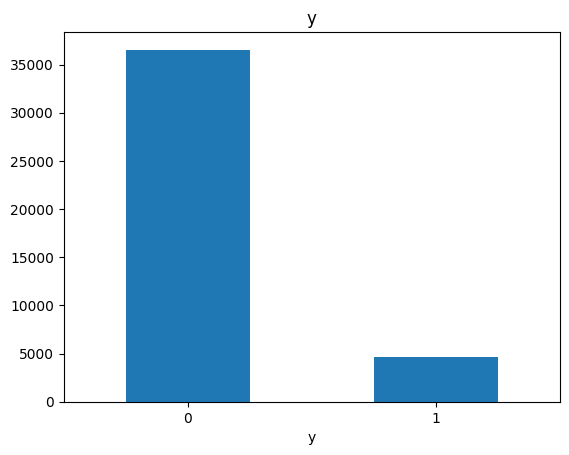

In [55]:
import matplotlib.pyplot as plt

bank_plot.cols['y'].hist()

In [56]:
import seaborn as sns

sns.countplot(x = "y", hue = "job", data = pdf)




NameError: ignored

<Axes: xlabel='y', ylabel='age'>

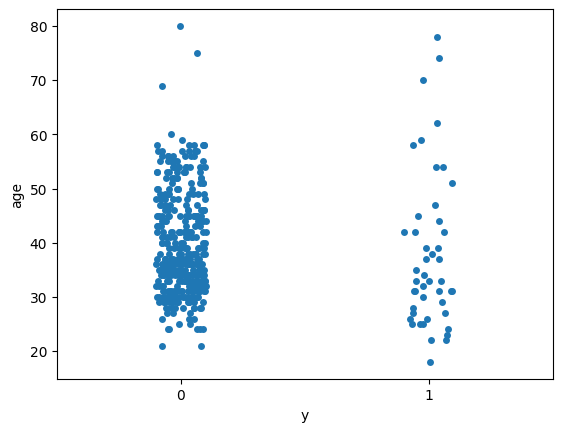

In [ ]:
sns.stripplot(x = "y", y = "age", data = pdf)

<Axes: xlabel='y', ylabel='count'>

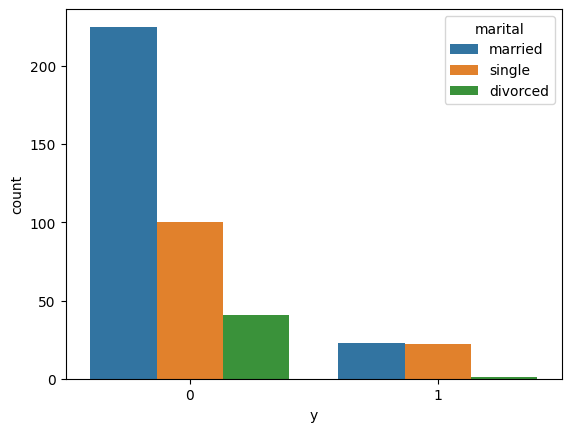

In [ ]:
sns.countplot(x = "y", hue = "marital", data = pdf)

<Axes: xlabel='y', ylabel='count'>

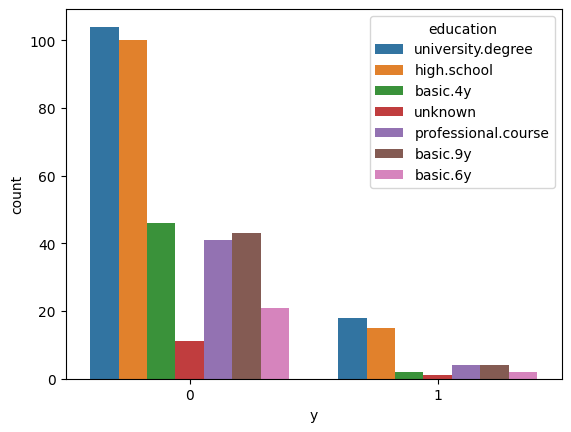

In [ ]:
sns.countplot(x = "y", hue = "education", data = pdf)

<Axes: xlabel='y', ylabel='count'>

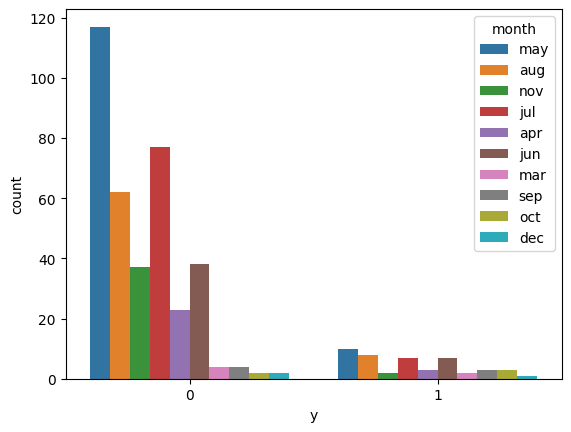

In [ ]:
sns.countplot(x = "y", hue = "month", data = pdf)

<Axes: xlabel='y', ylabel='count'>

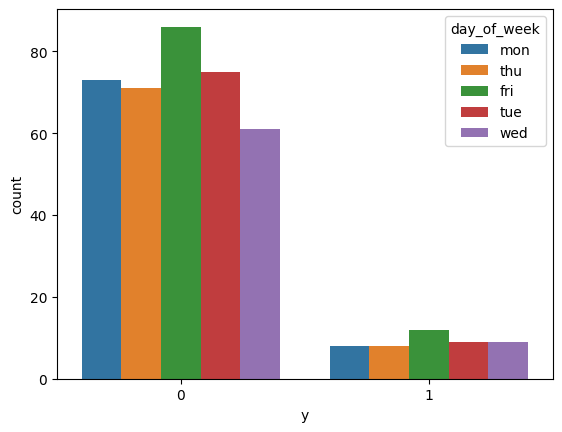

In [ ]:
sns.countplot(x = "y", hue = "day_of_week", data = pdf)

<Axes: xlabel='y', ylabel='count'>

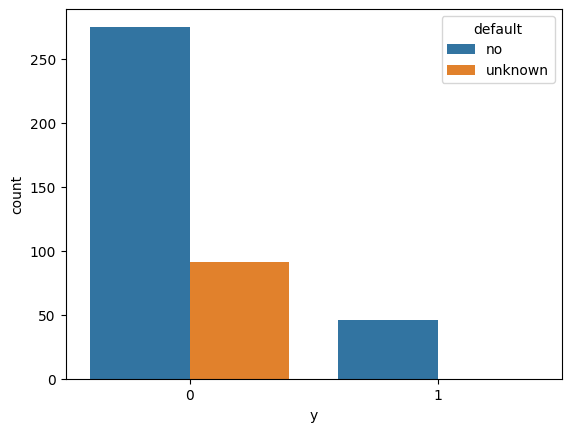

In [ ]:
sns.countplot(x = "y", hue = "default", data = pdf)

In [120]:
#it is not use/ just for learning another approach
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

all_bank_data=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome'
,'emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
for col in all_bank_data:
  outCol='i_'+col
  bank_plot=bank_plot.drop(outCol)
   # bank_plot = StringIndexer(inputCol=col,outputCol=outCol,handleInvalid='keep').fit(bank_plot).transform(bank_plot)
  bank_plot = StringIndexer(inputCol=col,outputCol=outCol).fit(bank_plot).transform(bank_plot)
  bank_plot = OneHotEncoder(inputCol='i_'+col,outputCol='lable_'+col).fit(bank_plot).transform(bank_plot)
 

bank_plot.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-----+---------------+-----+--------------+---------+-------------+-----------+---------------+---------+-------------+---------+-------------+------+-------------+---------+-------------+-------+-------------+-------------+-----------------+----------+-------------------+----------+--------------+-------+--------------+----------+--------------+----------+--------------+--------------+------------------+----------------+--------------------+---------------+-------------------+-----------+-----------------+-------------+-----------------+---+-------------+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|i_age|      lable_age|i_j

In [57]:
#it is used for this dataset
from pyspark.ml.feature import StringIndexer
all_bank_data=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome'
,'emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
for col in all_bank_data:
  outCol='i_'+col
  bank_plot=bank_plot.drop(outCol)
     # bank_plot = StringIndexer(inputCol=col,outputCol=outCol,handleInvalid='keep').fit(bank_plot).transform(bank_plot)
  bank_plot = StringIndexer(inputCol=col,outputCol=outCol).fit(bank_plot).transform(bank_plot)

bank_plot.show()

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+----------------+---------------+-----------+-------------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|i_age|i_job|i_marital|i_education|i_default|i_housing|i_loan|i_contact|i_month|i_day_of_week|i_duration|i_campaign|i_pdays|i_previous|i_poutcome|i_emp_var_rate|i_cons_price_idx|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+--

In [58]:
bank_plot=bank_plot.drop('age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome'
,'emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y')

bank_plot.show()

+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+----------------+---------------+-----------+-------------+---+
|i_age|i_job|i_marital|i_education|i_default|i_housing|i_loan|i_contact|i_month|i_day_of_week|i_duration|i_campaign|i_pdays|i_previous|i_poutcome|i_emp_var_rate|i_cons_price_idx|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|
+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+----------------+---------------+-----------+-------------+---+
| 17.0|  1.0|      0.0|        4.0|      1.0|      0.0|   0.0|      0.0|    2.0|          0.0|     145.0|       0.0|    0.0|       0.0|       0.0|           0.0|             3.0|            3.0|        2.0|          0.0|0.0|
| 26.0|  2.0|      0.0|        6.0|      0.0|      1.0|   0.0|      0.0|    4.0|          4.0|     1

In [59]:
bank_plot = bank_plot.drop("i_cons_price_idx")
bank_plot.show()

+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+
|i_age|i_job|i_marital|i_education|i_default|i_housing|i_loan|i_contact|i_month|i_day_of_week|i_duration|i_campaign|i_pdays|i_previous|i_poutcome|i_emp_var_rate|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|
+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+
| 17.0|  1.0|      0.0|        4.0|      1.0|      0.0|   0.0|      0.0|    2.0|          0.0|     145.0|       0.0|    0.0|       0.0|       0.0|           0.0|            3.0|        2.0|          0.0|0.0|
| 26.0|  2.0|      0.0|        6.0|      0.0|      1.0|   0.0|      0.0|    4.0|          4.0|     102.0|       0.0|    0.0|       0.0|       0.0|           3.0|       

In [60]:
from pyspark.ml.feature import VectorAssembler
bank_features=['i_age','i_job','i_marital','i_education','i_default','i_housing','i_loan','i_contact','i_month','i_day_of_week','i_duration','i_campaign','i_pdays',
               'i_previous','i_poutcome','i_emp_var_rate','i_cons_price_idx','i_cons_conf_idx','i_euribor3m','i_nr_employed','i_y']
features_vector_all = VectorAssembler(inputCols=bank_plot.columns, outputCol='AllFeatures')
transformed_dataset = features_vector_all.transform(bank_plot)
transformed_dataset.select(transformed_dataset["AllFeatures"]).show(truncate=False)

+-------------------------------------------------------------------------------------------+
|AllFeatures                                                                                |
+-------------------------------------------------------------------------------------------+
|(20,[0,1,3,4,8,10,16,17],[17.0,1.0,4.0,1.0,2.0,145.0,3.0,2.0])                             |
|(20,[0,1,3,5,8,9,10,15,16,17,18],[26.0,2.0,6.0,1.0,4.0,4.0,102.0,3.0,5.0,20.0,3.0])        |
|[18.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,291.0,2.0,2.0,2.0,2.0,6.0,17.0,176.0,6.0,1.0]    |
|(20,[0,1,3,5,8,9,10,11,15,16,17,18],[9.0,3.0,1.0,1.0,5.0,4.0,110.0,1.0,1.0,6.0,6.0,1.0])   |
|[30.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,4.0,93.0,0.0,1.0,1.0,2.0,4.0,7.0,70.0,4.0,1.0]       |
|(20,[0,1,2,3,8,9,10,11,16,17],[6.0,4.0,2.0,4.0,1.0,3.0,55.0,7.0,1.0,3.0])                  |
|(20,[0,1,3,10,15,16,17,18],[7.0,1.0,4.0,162.0,1.0,2.0,28.0,1.0])                           |
|(20,[0,1,2,3,9,10,15,16,17,18],[9.0,1.0,2.0,2.0,4.0,121.0,1

In [97]:
from pyspark.ml.stat import Correlation
pearsonCorrelation = Correlation.corr(transformed_dataset, 'AllFeatures', 'pearson').collect()[0][0]
print(str(pearsonCorrelation))
transformed_dataset.show(truncate=0)

#https://stackoverflow.com/questions/52214404/how-to-get-the-correlation-matrix-of-a-pyspark-data-frame

DenseMatrix([[ 1.00000000e+00,  2.19315993e-01,  4.58382458e-03,
               1.58554821e-01,  7.66198565e-02, -1.73235016e-03,
              -2.95728931e-03, -3.45496510e-02,  1.07133117e-01,
               9.40216348e-03,  9.65943496e-03, -6.76079166e-03,
               5.62786961e-02,  9.34173455e-02,  9.33717584e-02,
               1.35318756e-01,  1.75240453e-01,  1.62258495e-01,
               1.62252975e-01,  1.11944244e-01],
             [ 2.19315993e-01,  1.00000000e+00, -4.70613442e-03,
               8.56211734e-02,  2.70606094e-02,  1.34790505e-03,
              -3.55289392e-03,  1.27882979e-03,  8.37133371e-02,
              -1.04375756e-02,  9.19716315e-04, -1.33494736e-02,
               3.59290232e-02,  5.24499201e-02,  5.13732241e-02,
               1.13599212e-01,  1.09296093e-01,  1.00044635e-01,
               1.21856526e-01,  5.58519030e-02],
             [ 4.58382458e-03, -4.70613442e-03,  1.00000000e+00,
              -1.04975048e-01, -1.03929920e-01, -3.643352

<ipython-input-25-388dfd15998b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


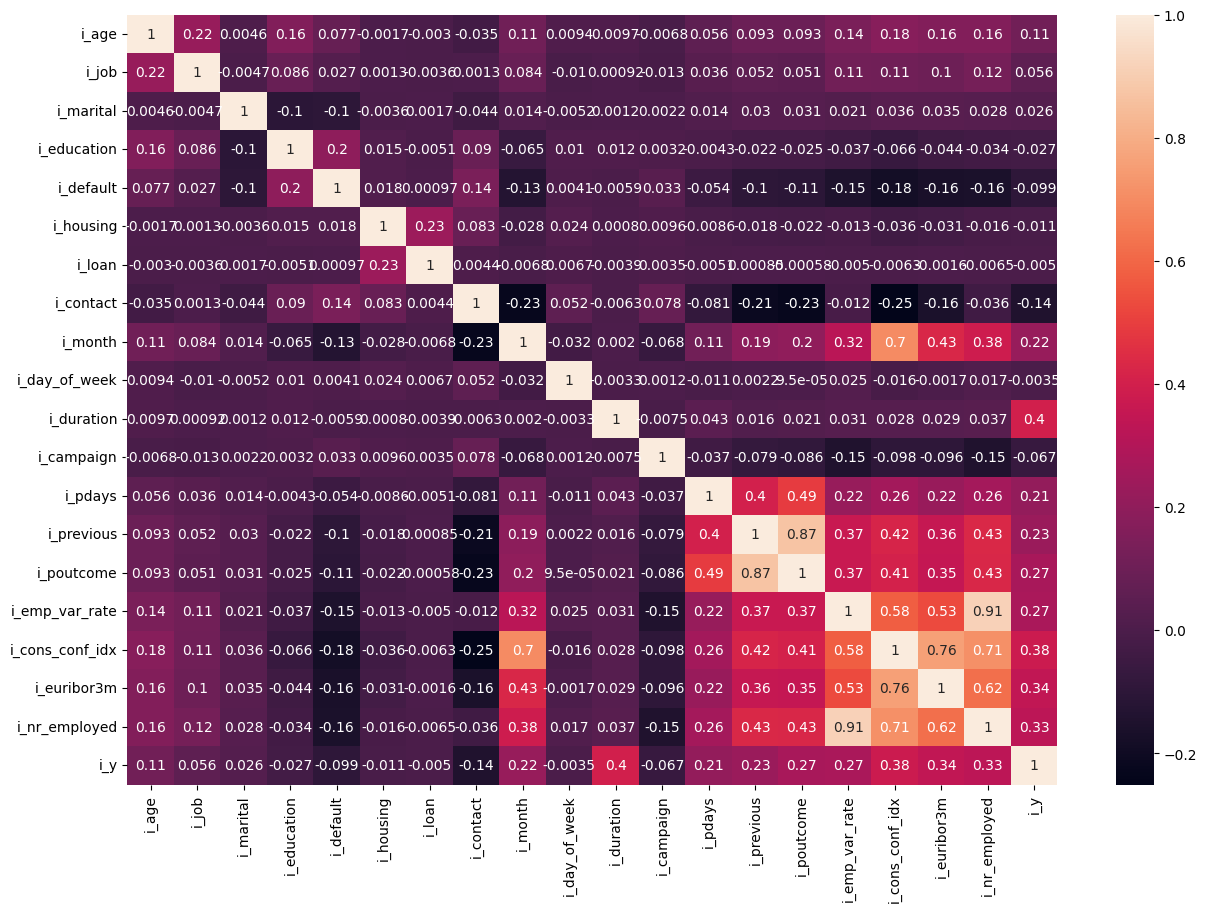

In [25]:
import seaborn as sns

data = transformed_dataset.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [61]:
#Svm for all data

from pyspark.ml.classification import LinearSVC
from pyspark.mllib.evaluation import MulticlassMetrics

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
train_svm, test_svm = transformed_dataset.randomSplit([0.7, 0.3], seed=1)
lsvc = LinearSVC(featuresCol='AllFeatures',labelCol="i_y", regParam=1.0,maxIter=100,standardization = True,fitIntercept=True,threshold=1.0,aggregationDepth=2,maxBlockSizeInMB=0.0)

lsvcModel = lsvc.fit(train_svm)
tst_1 = lsvcModel.transform(test_svm)
svm_summary = lsvcModel.summary

tst_1.show()


+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+----------+
|i_age|i_job|i_marital|i_education|i_default|i_housing|i_loan|i_contact|i_month|i_day_of_week|i_duration|i_campaign|i_pdays|i_previous|i_poutcome|i_emp_var_rate|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|         AllFeatures|       rawPrediction|prediction|
+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+----------+
|  0.0|  0.0|      0.0|        0.0|      0.0|      0.0|   0.0|      0.0|    0.0|          2.0|    1047.0|       1.0|    8.0|       1.0|       2.0|           1.0|            2.0|       22.0|          1.0|1.0|(20,[9,10,

In [62]:
#evaluate Svm for all data
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
svm_summary = lsvcModel.summary
#accuracy = lsvcModel.summary.accuracy
print("****************")

my_mc_lr_svm = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='accuracy')
print(f"Accuracy is: {my_mc_lr_svm.evaluate(tst_1)}")

print("****************")

my_mc_tst_svm = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedPrecision')
print(f"Precision is: {my_mc_tst_svm.evaluate(tst_1)}")
print("****************")
my_mc_tst_svm = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedRecall')
print(f"Recall is: {my_mc_tst_svm.evaluate(tst_1)}")

****************
Accuracy is: 0.8892941081124889
****************
Precision is: 0.790844010723587
****************
Recall is: 0.8892941081124889


In [63]:
#with all columns
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

train_reg, test_reg = transformed_dataset.randomSplit([0.7, 0.3], seed=1)
print('Count of Training Dataset : ' , train_reg.count())
print('Count of Testing Dataset: ' , test_reg.count())
lr = LogisticRegression(featuresCol='AllFeatures',labelCol="i_y",regParam=1.0)
lrn = lr.fit(train_reg)
tst_reg = lrn.transform(test_reg)
lrn_summary = lrn.summary
tst_reg.show()
tst_reg.select(tst_reg["rawPrediction"],tst_reg["probability"],tst_reg["prediction"]).show(truncate=False)

Count of Training Dataset :  28849
Count of Testing Dataset:  12339
+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+--------------------+----------+
|i_age|i_job|i_marital|i_education|i_default|i_housing|i_loan|i_contact|i_month|i_day_of_week|i_duration|i_campaign|i_pdays|i_previous|i_poutcome|i_emp_var_rate|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|         AllFeatures|       rawPrediction|         probability|prediction|
+-----+-----+---------+-----------+---------+---------+------+---------+-------+-------------+----------+----------+-------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+--------------------+----------+
|  0.0|  0.0|      0.0|        0.0|      0.0|      0.0|   0.0|      0.0|    0.0|      

In [40]:
#evaluated model with all columns

from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='i_y')
tst_reg.select('i_y','prediction')
AUC = eval.evaluate(tst_reg)
print("AUC score is : ",AUC)

AUC score is :  0.9504068206512744


In [64]:
#evaluated model with all columns

from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


print("****************")

my_mc_lr = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='accuracy')
print(f"Accuracy is: {my_mc_lr.evaluate(tst_reg)}")

print("****************")

my_mc_tst = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedPrecision')
print(f"Precision is: {my_mc_tst.evaluate(tst_reg)}")
print("****************")

my_mc_tstt = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedRecall')
print(f"Recall is: {my_mc_tstt.evaluate(tst_reg)}")

****************
Accuracy is: 0.8910770726963287
****************
Precision is: 0.9029624680276702
****************
Recall is: 0.8910770726963287


In [65]:
from pyspark.ml.stat import Correlation
selectedFeatures = bank_plot
for col in selectedFeatures.columns:
  if(col!="i_y" and col !="AllFeatures"):
        corr=selectedFeatures.stat.corr(col, "i_y")
        print("\n\n",col,"correlation is: ",corr)
        if(corr<0.23 and corr>-0.12):
        #if(corr<0.1 and corr>-0.1):
            selectedFeatures=selectedFeatures.drop(col)
selectedFeatures.show()



 i_age correlation is:  0.11194424394584616


 i_job correlation is:  0.05585190299714619


 i_marital correlation is:  0.026302335373633946


 i_education correlation is:  -0.026790636525473956


 i_default correlation is:  -0.09935179776148371


 i_housing correlation is:  -0.01137898685801108


 i_loan correlation is:  -0.0050383492979186855


 i_contact correlation is:  -0.14477305571200025


 i_month correlation is:  0.22268368982305878


 i_day_of_week correlation is:  -0.003524949896526646


 i_duration correlation is:  0.39843433298895947


 i_campaign correlation is:  -0.06677182685935279


 i_pdays correlation is:  0.20858137334618929


 i_previous correlation is:  0.23018100321659002


 i_poutcome correlation is:  0.2703731053271903


 i_emp_var_rate correlation is:  0.2735564064533325


 i_cons_conf_idx correlation is:  0.37638906254157634


 i_euribor3m correlation is:  0.3412227952039973


 i_nr_employed correlation is:  0.3285137546267951
+---------+----------+--------

In [66]:
from pyspark.ml.feature import VectorAssembler
#bank_features=['i_age','i_job','i_marital','i_education','i_default','i_housing','i_loan','i_contact','i_month','i_day_of_week','i_duration','i_campaign','i_pdays',
#               'i_previous','i_poutcome','i_emp_var_rate','i_cons_price_idx','i_cons_conf_idx','i_euribor3m','i_nr_employed','i_y']
features_vector = VectorAssembler(inputCols=selectedFeatures.columns, outputCol='AllFeatures')
transformed_dataset_2 = features_vector.transform(selectedFeatures)
transformed_dataset_2.select(transformed_dataset_2["AllFeatures"]).show(truncate=False)

+------------------------------------------+
|AllFeatures                               |
+------------------------------------------+
|(9,[1,5,6],[145.0,3.0,2.0])               |
|[0.0,102.0,0.0,0.0,3.0,5.0,20.0,3.0,0.0]  |
|[0.0,291.0,2.0,2.0,6.0,17.0,176.0,6.0,1.0]|
|[0.0,110.0,0.0,0.0,1.0,6.0,6.0,1.0,0.0]   |
|[0.0,93.0,1.0,2.0,4.0,7.0,70.0,4.0,1.0]   |
|(9,[1,5,6],[55.0,1.0,3.0])                |
|[0.0,162.0,0.0,0.0,1.0,2.0,28.0,1.0,0.0]  |
|[0.0,121.0,0.0,0.0,1.0,2.0,31.0,1.0,0.0]  |
|[0.0,99.0,1.0,2.0,4.0,8.0,15.0,4.0,1.0]   |
|[0.0,121.0,1.0,1.0,1.0,6.0,38.0,1.0,0.0]  |
|[1.0,127.0,0.0,0.0,2.0,0.0,8.0,2.0,0.0]   |
|(9,[1,5,6],[828.0,3.0,5.0])               |
|(9,[1,5,6,8],[393.0,3.0,7.0,1.0])         |
|[0.0,57.0,0.0,0.0,1.0,2.0,27.0,1.0,0.0]   |
|(9,[0,1,5,6],[1.0,1217.0,4.0,9.0])        |
|(9,[1,5,6],[69.0,1.0,1.0])                |
|[0.0,955.0,0.0,0.0,1.0,6.0,37.0,1.0,1.0]  |
|[1.0,631.0,0.0,0.0,3.0,24.0,12.0,3.0,1.0] |
|[1.0,42.0,0.0,0.0,2.0,0.0,12.0,2.0,0.0]   |
|(9,[1,5,6

In [67]:
#svm after feature selection

from pyspark.ml.classification import LinearSVC
from pyspark.mllib.evaluation import MulticlassMetrics

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_2 = BinaryClassificationEvaluator()

train_svm_2, test_svm_2 = transformed_dataset_2.randomSplit([0.7, 0.3], seed=1)
lsvc_2 = LinearSVC(featuresCol='AllFeatures',labelCol="i_y", regParam=1.0,maxIter=100,standardization = True,fitIntercept=True,threshold=1.0,aggregationDepth=2,maxBlockSizeInMB=0.0)

lsvcModel_2 = lsvc_2.fit(train_svm_2)
tst_svm_2 = lsvcModel_2.transform(test_svm_2)
svm_summary_2 = lsvcModel_2.summary

tst_svm_2.show()

+---------+----------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+----------+
|i_contact|i_duration|i_previous|i_poutcome|i_emp_var_rate|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|         AllFeatures|       rawPrediction|prediction|
+---------+----------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+----------+
|      0.0|       0.0|       0.0|       0.0|           0.0|            1.0|        1.0|          0.0|0.0| (9,[5,6],[1.0,1.0])|[1.03597534085687...|       0.0|
|      0.0|       0.0|       0.0|       0.0|           0.0|            1.0|        1.0|          0.0|0.0| (9,[5,6],[1.0,1.0])|[1.03597534085687...|       0.0|
|      0.0|       0.0|       0.0|       0.0|           0.0|            1.0|        2.0|          0.0|0.0| (9,[5,6],[1.0,2.0])|[1.03589768103099...|       0.0|
|      0.0|       0.0|       0.0|       0.0|  

In [68]:
#evaluate for svm after feature selection

from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
svm_summary = lsvcModel.summary
my_mc_lr_2 = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='accuracy')
print(f"Accuracy is: {my_mc_lr_2.evaluate(tst_svm_2)}")
print("****************")
my_mc_tst_2 = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedPrecision')
print(f"precision is: {my_mc_tst_2.evaluate(tst_svm_2)}")
print("****************")
my_mc_tst_2 = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedRecall')
print(f"recall is: {my_mc_tst_2.evaluate(tst_svm_2)}")

Accuracy is: 0.8846746089634492
****************
precision is: 0.7826491637446318
****************
recall is: 0.8846746089634492


In [69]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

train_2, test_2 = transformed_dataset_2.randomSplit([0.7, 0.3], seed=1)
print('Count of Training Dataset : ' , train_2.count())
print('Count of Testing Dataset: ' , test_2.count())
lr_2 = LogisticRegression(featuresCol='AllFeatures',labelCol="i_y",regParam=1.0)
lrn_2 = lr_2.fit(train_2)
tst_reg_2 = lrn_2.transform(test_2)
lrn_summary_2 = lrn_2.summary
tst_reg_2.show()
tst_reg_2.select(tst_reg_2["rawPrediction"],tst_reg_2["probability"],tst_reg_2["prediction"]).show(truncate=False)



Count of Training Dataset :  28849
Count of Testing Dataset:  12339
+---------+----------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+--------------------+----------+
|i_contact|i_duration|i_previous|i_poutcome|i_emp_var_rate|i_cons_conf_idx|i_euribor3m|i_nr_employed|i_y|         AllFeatures|       rawPrediction|         probability|prediction|
+---------+----------+----------+----------+--------------+---------------+-----------+-------------+---+--------------------+--------------------+--------------------+----------+
|      0.0|       0.0|       0.0|       0.0|           0.0|            1.0|        1.0|          0.0|0.0| (9,[5,6],[1.0,1.0])|[2.54053054437023...|[0.92693476673953...|       0.0|
|      0.0|       0.0|       0.0|       0.0|           0.0|            1.0|        1.0|          0.0|0.0| (9,[5,6],[1.0,1.0])|[2.54053054437023...|[0.92693476673953...|       0.0|
|      0.0|       0.0|       0.0

In [ ]:
#evaluated model with drop some columns

from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval_2 = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='i_y')
tst_reg_2.select('i_y','prediction')
AUC_2 = eval.evaluate(tst_reg_2)
print("AUC score is : ",AUC_2)

AUC score is :  0.5913562895291637


In [70]:
#evaluated model with drop some columns

from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

print("****************")

my_mc_lr_reg = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='accuracy')
print(f"Accuracy is: {my_mc_lr_reg.evaluate(tst_reg_2)}")
print("****************")
my_mc_tst_reg = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedPrecision')
print(f"precision is: {my_mc_tst_reg.evaluate(tst_reg_2)}")
print("****************")
my_mc_tst_reg = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='i_y', metricName='weightedRecall')
print(f"recall is: {my_mc_tst_reg.evaluate(tst_reg_2)}")


****************
Accuracy is: 0.8850798281870492
****************
precision is: 0.8982918278328059
****************
recall is: 0.8850798281870491


In [ ]:
#Svm for all data

from pyspark.ml.classification import LinearSVC

train, test = transformed_dataset.randomSplit([0.7, 0.3], seed=1)
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(train)

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

IllegalArgumentException: ignored